In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#droping some unhelpful columns
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


<AxesSubplot:>

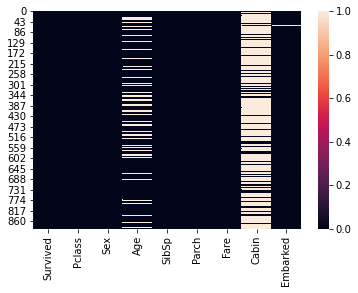

In [6]:
sns.heatmap(df.isnull())

In [7]:
#as cabin contains lots of null values droping cabin
df.drop(['Cabin'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


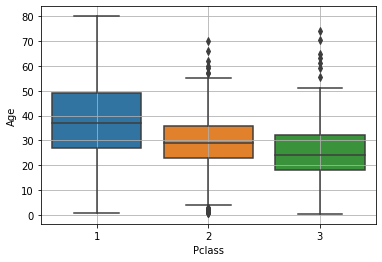

In [10]:
sns.boxplot(data=df,x='Pclass',y='Age')
plt.grid()

In [11]:
def fillage(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 38
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age
    

In [12]:
df['Age']=df[['Age','Pclass']].apply(fillage,axis=1)

<AxesSubplot:>

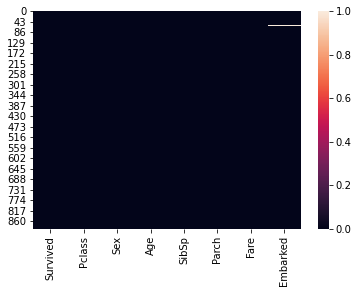

In [13]:
sns.heatmap(df.isna())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [16]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

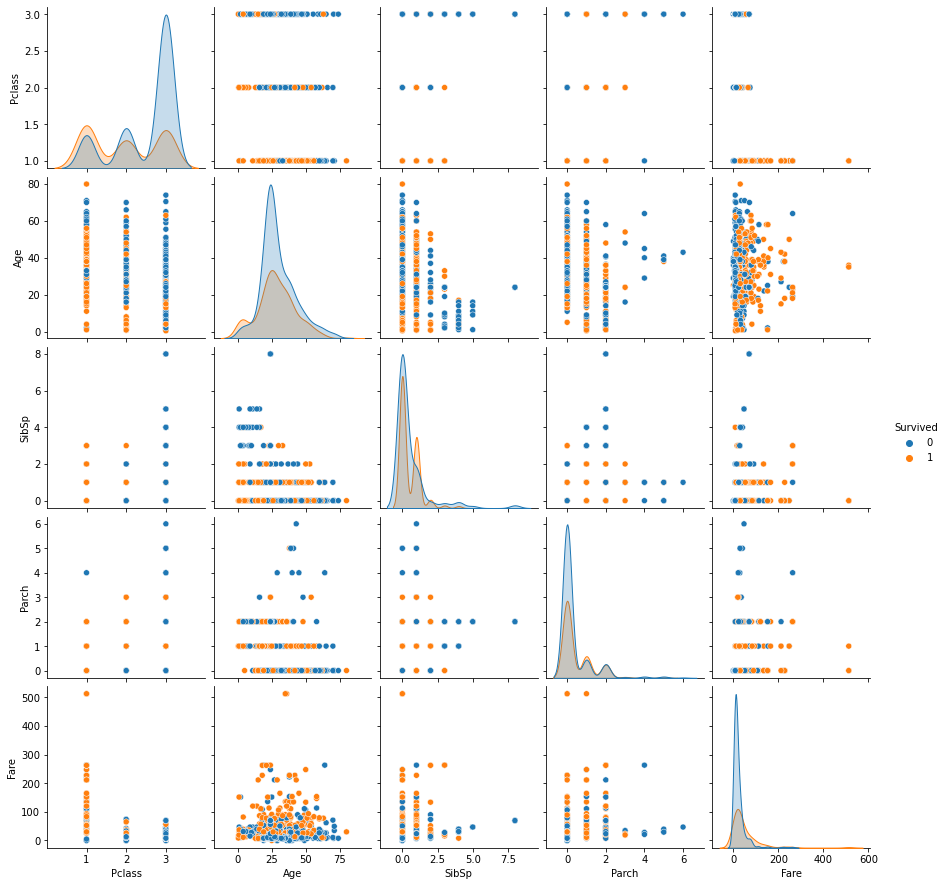

In [17]:
sns.pairplot(df,hue='Survived')

In [18]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [19]:
#encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
ct = ColumnTransformer(transformers= [("encoder", OneHotEncoder(), ["Sex","Embarked"])], remainder="passthrough")
x = np.array(ct.fit_transform(x))

In [21]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [23]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()

In [24]:
from sklearn.metrics import classification_report

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(f'accuracy: {classification_report(ypred,ytest)}')

In [25]:
mymodel(logreg)

accuracy:               precision    recall  f1-score   support

           0       0.83      0.78      0.80       140
           1       0.66      0.72      0.69        83

    accuracy                           0.76       223
   macro avg       0.74      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



In [26]:
mymodel(dt)

accuracy:               precision    recall  f1-score   support

           0       0.80      0.80      0.80       133
           1       0.70      0.71      0.71        90

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



In [27]:
mymodel(knn)

accuracy:               precision    recall  f1-score   support

           0       0.78      0.74      0.76       140
           1       0.59      0.65      0.62        83

    accuracy                           0.70       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.71      0.70      0.71       223



In [28]:
mymodel(svm)

accuracy:               precision    recall  f1-score   support

           0       0.89      0.64      0.75       184
           1       0.27      0.64      0.38        39

    accuracy                           0.64       223
   macro avg       0.58      0.64      0.57       223
weighted avg       0.79      0.64      0.68       223



In [29]:
#hypertunning
from sklearn.metrics import accuracy_score
accuracy=[]
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    accuracy.append(accuracy_score(ytest, ypred))

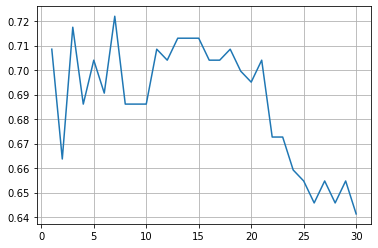

In [30]:
plt.plot(range(1,31), accuracy)
plt.grid(True)
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)

In [32]:
mymodel(knn)

accuracy:               precision    recall  f1-score   support

           0       0.80      0.74      0.77       143
           1       0.59      0.68      0.63        80

    accuracy                           0.72       223
   macro avg       0.70      0.71      0.70       223
weighted avg       0.73      0.72      0.72       223



In [33]:
logreg1 = LogisticRegression(solver='liblinear')

In [34]:
mymodel(logreg1)

accuracy:               precision    recall  f1-score   support

           0       0.84      0.78      0.81       143
           1       0.65      0.74      0.69        80

    accuracy                           0.76       223
   macro avg       0.74      0.76      0.75       223
weighted avg       0.77      0.76      0.77       223



In [35]:
svm = SVC()

In [36]:
para = {"C":[0,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001], "kernel":["rbf"]}

In [37]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), para, refit=True, verbose=3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=0, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....................C=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=0, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
para = {"C":[0,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001], "kernel":["sigmoid"]}

In [39]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [40]:
ypred = grid.predict(xtest)

In [41]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       132
           1       0.73      0.73      0.73        91

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [42]:
para1= {"C":[0,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001], "kernel":["sigmoid"]}

grid1 = GridSearchCV(SVC(), para1, refit=True, verbose=3)
grid1.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ...................C=0, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .................C=0, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ................C=0, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ................C=0, gamma=0.01, k

[CV 4/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ..............C=1000, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .............C=1000, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ............C=1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             verbose=3)

In [43]:
para3= {"C":[0,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001], "kernel":["polynomial"]}

grid3 = GridSearchCV(SVC(), para3, refit=True, verbose=3)
grid3.fit(xtrain, ytrain)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ................C=0, gamma=1, kernel=polynomial; total time=   0.0s
[CV 2/5] END ................C=0, gamma=1, kernel=polynomial; total time=   0.0s
[CV 3/5] END ................C=0, gamma=1, kernel=polynomial; total time=   0.0s
[CV 4/5] END ................C=0, gamma=1, kernel=polynomial; total time=   0.0s
[CV 5/5] END ................C=0, gamma=1, kernel=polynomial; total time=   0.0s
[CV 1/5] END ..............C=0, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 2/5] END ..............C=0, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 3/5] END ..............C=0, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 4/5] END ..............C=0, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 5/5] END ..............C=0, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 1/5] END .............C=0, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV 2/5] END .............C=0, gamma=0.01, kern

[CV 2/5] END .............C=1000, gamma=1, kernel=polynomial; total time=   0.0s
[CV 3/5] END .............C=1000, gamma=1, kernel=polynomial; total time=   0.0s
[CV 4/5] END .............C=1000, gamma=1, kernel=polynomial; total time=   0.0s
[CV 5/5] END .............C=1000, gamma=1, kernel=polynomial; total time=   0.0s
[CV 1/5] END ...........C=1000, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 2/5] END ...........C=1000, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 3/5] END ...........C=1000, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 4/5] END ...........C=1000, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 5/5] END ...........C=1000, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV 1/5] END ..........C=1000, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV 2/5] END ..........C=1000, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV 3/5] END ..........C=1000, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV 4/5] END ..........C=100

ValueError: 'polynomial' is not in list

In [44]:
print(f'grid  : {grid.best_params_}')
print(f'grid1 : {grid1.best_params_}')
print(f'grid3 : {grid3.best_params_}')

grid  : {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
grid1 : {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
grid3 : {'C': 0, 'gamma': 1, 'kernel': 'polynomial'}


In [45]:
accuracydt=[]
for i in range(1,75):
    dt5 = DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(xtrain, ytrain)
    ypred = dt5.predict(xtest)
    accuracydt.append(accuracy_score(ytest, ypred))

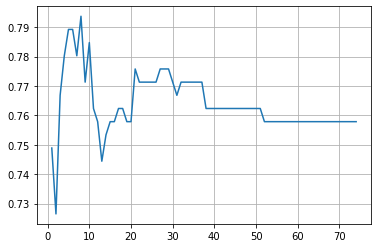

In [46]:
plt.plot(range(1,75),accuracydt)
plt.grid(True)
plt.show()

In [47]:
accuracydte=[]
for i in range(1,75):
    dt6 = DecisionTreeClassifier(max_depth=i)
    dt6.fit(xtrain, ytrain)
    ypred = dt6.predict(xtest)
    print(accuracy_score(ytest, ypred))

0.7623318385650224
0.757847533632287
0.7802690582959642
0.7802690582959642
0.7757847533632287
0.7668161434977578
0.7713004484304933
0.7713004484304933
0.7623318385650224
0.7488789237668162
0.7533632286995515
0.7399103139013453
0.7309417040358744
0.7443946188340808
0.7533632286995515
0.7533632286995515
0.7443946188340808
0.7399103139013453
0.757847533632287
0.757847533632287
0.7443946188340808
0.7623318385650224
0.7488789237668162
0.757847533632287
0.7443946188340808
0.7488789237668162
0.7443946188340808
0.7533632286995515
0.7488789237668162
0.7443946188340808
0.7399103139013453
0.7443946188340808
0.7668161434977578
0.7533632286995515
0.7488789237668162
0.7533632286995515
0.7443946188340808
0.757847533632287
0.7443946188340808
0.757847533632287
0.7533632286995515
0.757847533632287
0.7488789237668162
0.7533632286995515
0.7443946188340808
0.7443946188340808
0.7623318385650224
0.7399103139013453
0.7443946188340808
0.7443946188340808
0.7443946188340808
0.7533632286995515
0.757847533632287
0

In [48]:
for i in range(1,75):
    dt2 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i)
    dt2.fit(xtrain, ytrain)
    ypred = dt2.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7623318385650224
 2 -: 0.7443946188340808
 3 -: 0.7713004484304933
 4 -: 0.7892376681614349
 5 -: 0.7757847533632287
 6 -: 0.7892376681614349
 7 -: 0.7847533632286996
 8 -: 0.7937219730941704
 9 -: 0.7937219730941704
 10 -: 0.7847533632286996
 11 -: 0.7623318385650224
 12 -: 0.757847533632287
 13 -: 0.7443946188340808
 14 -: 0.7533632286995515
 15 -: 0.757847533632287
 16 -: 0.757847533632287
 17 -: 0.7623318385650224
 18 -: 0.7623318385650224
 19 -: 0.757847533632287
 20 -: 0.757847533632287
 21 -: 0.7757847533632287
 22 -: 0.7713004484304933
 23 -: 0.7713004484304933
 24 -: 0.7713004484304933
 25 -: 0.7713004484304933
 26 -: 0.7713004484304933
 27 -: 0.7757847533632287
 28 -: 0.7757847533632287
 29 -: 0.7757847533632287
 30 -: 0.7713004484304933
 31 -: 0.7668161434977578
 32 -: 0.7713004484304933
 33 -: 0.7713004484304933
 34 -: 0.7713004484304933
 35 -: 0.7713004484304933
 36 -: 0.7713004484304933
 37 -: 0.7713004484304933
 38 -: 0.7623318385650224
 39 -: 0.7623318385650224


In [49]:
for i in range(1,75):
    dt3 = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dt3.fit(xtrain, ytrain)
    ypred = dt3.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7623318385650224
 2 -: 0.757847533632287
 3 -: 0.7802690582959642
 4 -: 0.7802690582959642
 5 -: 0.7802690582959642
 6 -: 0.7847533632286996
 7 -: 0.7623318385650224
 8 -: 0.7623318385650224
 9 -: 0.7847533632286996
 10 -: 0.7668161434977578
 11 -: 0.7668161434977578
 12 -: 0.7713004484304933
 13 -: 0.7488789237668162
 14 -: 0.7668161434977578
 15 -: 0.7443946188340808
 16 -: 0.757847533632287
 17 -: 0.757847533632287
 18 -: 0.757847533632287
 19 -: 0.7623318385650224
 20 -: 0.7623318385650224
 21 -: 0.7488789237668162
 22 -: 0.757847533632287
 23 -: 0.757847533632287
 24 -: 0.757847533632287
 25 -: 0.757847533632287
 26 -: 0.757847533632287
 27 -: 0.7713004484304933
 28 -: 0.757847533632287
 29 -: 0.7713004484304933
 30 -: 0.7443946188340808
 31 -: 0.7488789237668162
 32 -: 0.757847533632287
 33 -: 0.7713004484304933
 34 -: 0.757847533632287
 35 -: 0.7533632286995515
 36 -: 0.7533632286995515
 37 -: 0.7757847533632287
 38 -: 0.757847533632287
 39 -: 0.757847533632287
 40 -: 0.

In [50]:
for i in range(1,75):
    dt4 = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dt4.fit(xtrain, ytrain)
    ypred = dt4.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7623318385650224
 2 -: 0.757847533632287
 3 -: 0.7802690582959642
 4 -: 0.7802690582959642
 5 -: 0.7757847533632287
 6 -: 0.7668161434977578
 7 -: 0.7713004484304933
 8 -: 0.7757847533632287
 9 -: 0.7623318385650224
 10 -: 0.7533632286995515
 11 -: 0.757847533632287
 12 -: 0.7399103139013453
 13 -: 0.757847533632287
 14 -: 0.7443946188340808
 15 -: 0.7488789237668162
 16 -: 0.7443946188340808
 17 -: 0.7488789237668162
 18 -: 0.7623318385650224
 19 -: 0.7623318385650224
 20 -: 0.7533632286995515
 21 -: 0.7533632286995515
 22 -: 0.7533632286995515
 23 -: 0.7443946188340808
 24 -: 0.7399103139013453
 25 -: 0.7533632286995515
 26 -: 0.757847533632287
 27 -: 0.7354260089686099
 28 -: 0.7443946188340808
 29 -: 0.7399103139013453
 30 -: 0.7443946188340808
 31 -: 0.7443946188340808
 32 -: 0.7533632286995515
 33 -: 0.7488789237668162
 34 -: 0.7488789237668162
 35 -: 0.7488789237668162
 36 -: 0.7488789237668162
 37 -: 0.7354260089686099
 38 -: 0.7488789237668162
 39 -: 0.7443946188340808

In [51]:
for i in range(1,75):
    dt5 = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dt5.fit(xtrain, ytrain)
    ypred = dt5.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7623318385650224
 2 -: 0.757847533632287
 3 -: 0.7802690582959642
 4 -: 0.7802690582959642
 5 -: 0.7757847533632287
 6 -: 0.7668161434977578
 7 -: 0.7713004484304933
 8 -: 0.7713004484304933
 9 -: 0.7623318385650224
 10 -: 0.7443946188340808
 11 -: 0.7488789237668162
 12 -: 0.7354260089686099
 13 -: 0.7354260089686099
 14 -: 0.7488789237668162
 15 -: 0.7488789237668162
 16 -: 0.757847533632287
 17 -: 0.7488789237668162
 18 -: 0.7533632286995515
 19 -: 0.7443946188340808
 20 -: 0.7488789237668162
 21 -: 0.7533632286995515
 22 -: 0.7533632286995515
 23 -: 0.757847533632287
 24 -: 0.7533632286995515
 25 -: 0.7443946188340808
 26 -: 0.7488789237668162
 27 -: 0.7533632286995515
 28 -: 0.7399103139013453
 29 -: 0.7443946188340808
 30 -: 0.7533632286995515
 31 -: 0.7533632286995515
 32 -: 0.7354260089686099
 33 -: 0.7443946188340808
 34 -: 0.7488789237668162
 35 -: 0.7399103139013453
 36 -: 0.7533632286995515
 37 -: 0.7488789237668162
 38 -: 0.7488789237668162
 39 -: 0.748878923766816

In [52]:
#final result of all models
knn = KNeighborsClassifier(n_neighbors=3)
mymodel(knn)

accuracy:               precision    recall  f1-score   support

           0       0.80      0.74      0.77       143
           1       0.59      0.68      0.63        80

    accuracy                           0.72       223
   macro avg       0.70      0.71      0.70       223
weighted avg       0.73      0.72      0.72       223



In [53]:
logreg1 = LogisticRegression(solver='liblinear')
mymodel(logreg1)

accuracy:               precision    recall  f1-score   support

           0       0.84      0.78      0.81       143
           1       0.65      0.74      0.69        80

    accuracy                           0.76       223
   macro avg       0.74      0.76      0.75       223
weighted avg       0.77      0.76      0.77       223



In [54]:
print(f'grid  : {grid.best_params_}')
print(f'grid1 : {grid1.best_params_}')
print(f'grid3 : {grid3.best_params_}')

grid  : {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
grid1 : {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
grid3 : {'C': 0, 'gamma': 1, 'kernel': 'polynomial'}


In [55]:
svm=SVC(C=1000,gamma=0.001,kernel='rbf')
mymodel(svm)

accuracy:               precision    recall  f1-score   support

           0       0.82      0.81      0.82       133
           1       0.73      0.73      0.73        90

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [56]:
svm1=SVC(C=1,gamma=0.01,kernel='sigmoid')
mymodel(svm1)

accuracy:               precision    recall  f1-score   support

           0       0.95      0.60      0.73       209
           1       0.08      0.50      0.13        14

    accuracy                           0.59       223
   macro avg       0.51      0.55      0.43       223
weighted avg       0.89      0.59      0.70       223



In [57]:
'''svm2=SVC(C=0.1,gamma=1,kernel='poly')
mymodel(svm2)'''                                  #this code and kernel =linear is hanging my laptop hence unable to perform

"svm2=SVC(C=0.1,gamma=1,kernel='poly')\nmymodel(svm2)"

In [93]:
dt28=DecisionTreeClassifier(criterion='gini',max_depth=3)
mymodel(dt28)

accuracy:               precision    recall  f1-score   support

           0       0.85      0.79      0.82       141
           1       0.68      0.76      0.72        82

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223



In [94]:
dt11=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=3)
mymodel(dt11)

accuracy:               precision    recall  f1-score   support

           0       0.81      0.81      0.81       132
           1       0.73      0.73      0.73        91

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [95]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(dt11, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) #entropy

0.7941979305529105


In [96]:
cvs = cross_val_score(dt28, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) #gini

0.8065257411286739


In [84]:
cvs = cross_val_score(svm, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) #scm

0.7885545610359931


In [85]:
cvs = cross_val_score(svm1, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) #scm

0.6231828857995303


In [86]:
'''cvs = cross_val_score(svm2, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) #scm'''

'cvs = cross_val_score(svm2, x,y, cv=5, scoring="accuracy")\nprint(cvs.mean()) #scm'

In [87]:
from sklearn import tree

IndexError: index 8 is out of bounds for axis 0 with size 8

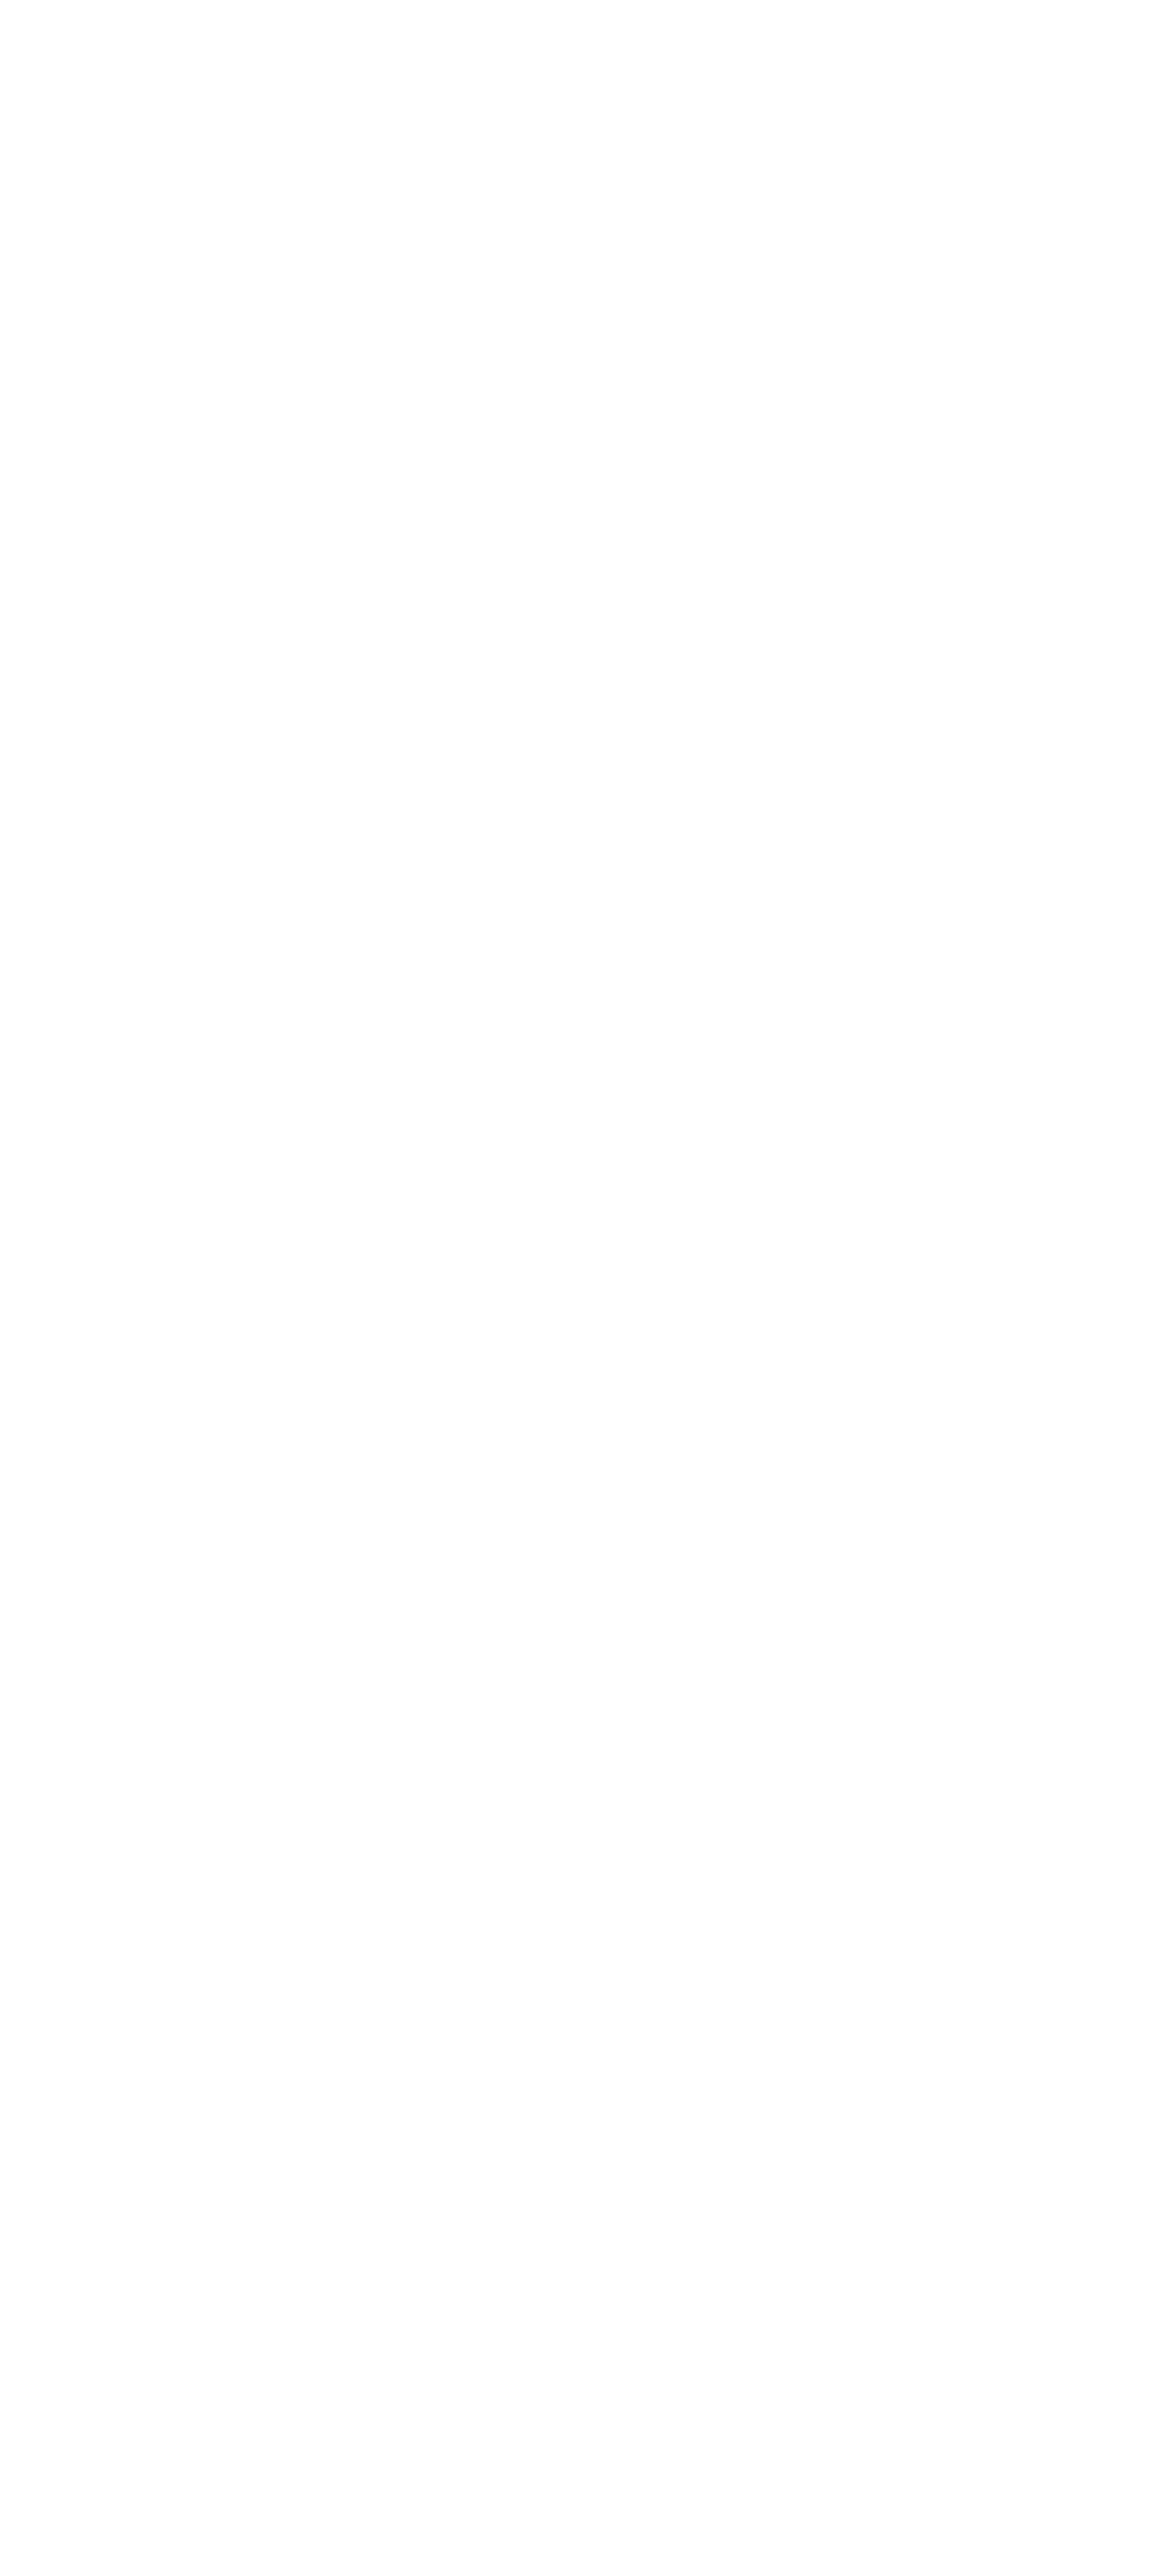

In [110]:
fig, ax = plt.subplots(figsize=(22,50))
chart = tree.plot_tree(dt11, feature_names=df.columns, filled="True",fontsize=13, proportion=True, rounded=10)

for node in chart:
    arrow = node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(3)                      

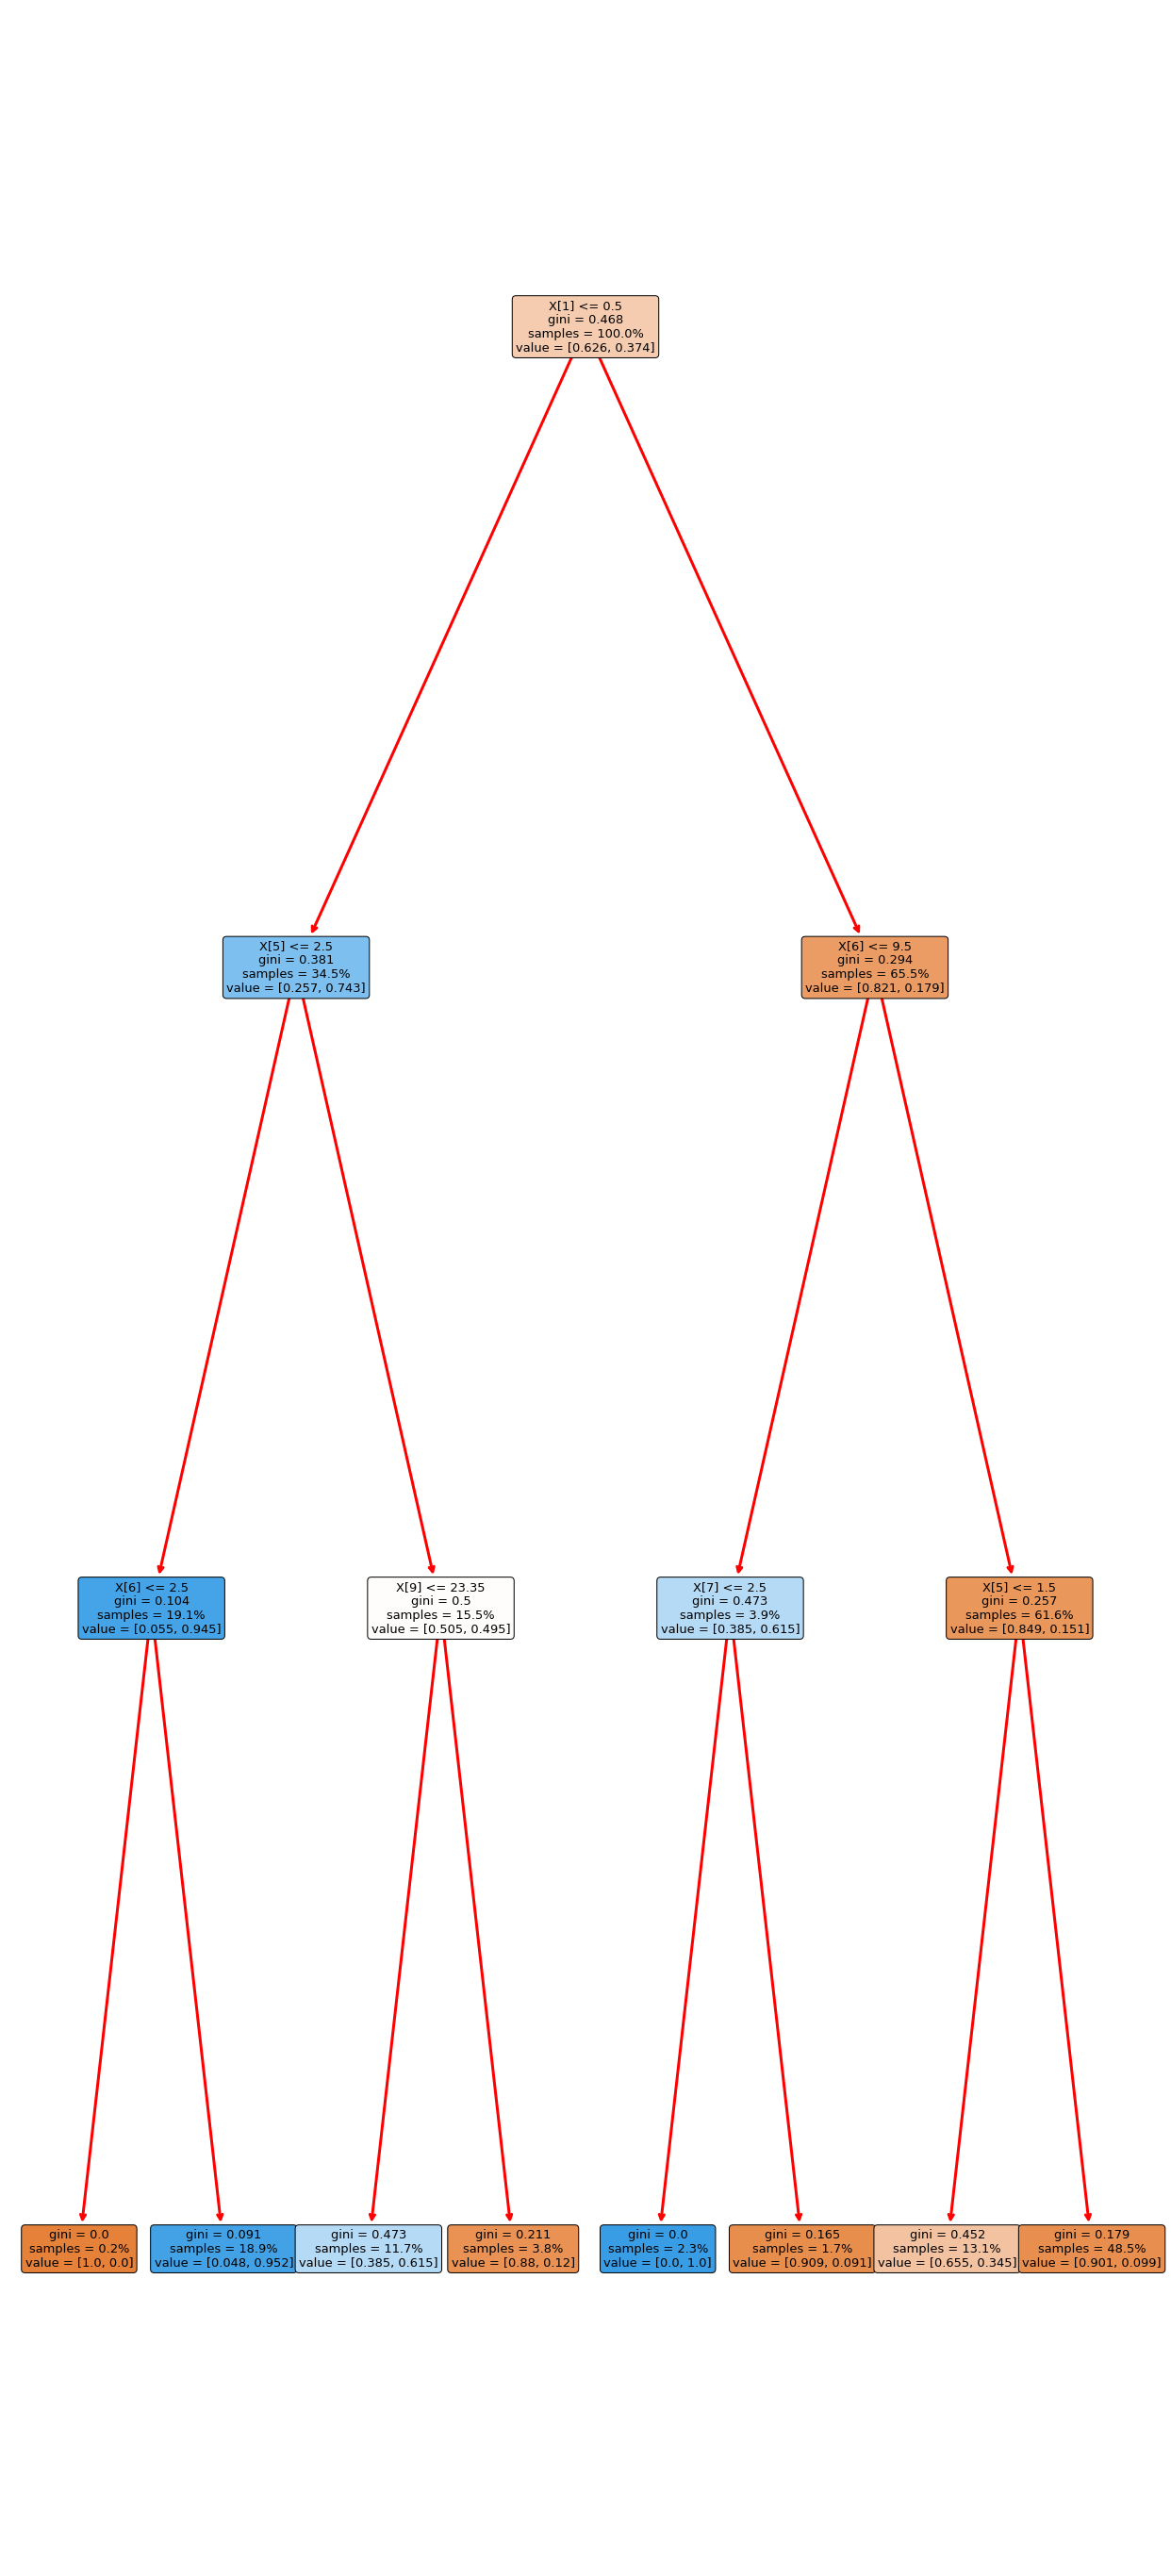

In [101]:
fig, ax = plt.subplots(figsize=(22,50))
chart = tree.plot_tree(dt28,  fontsize=13, filled="True", proportion=True, rounded=10)

for node in chart:
    arrow = node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(3)                      